# FINAL YEAR PROJECT(DB4)

### LEADER BASED COMMUNITY DETECTION IN ATTRIBUTED NETWORKS

KRISHNPRIYA DINESAN(AM.EN.U4CSE20339)

DEVESH KUMAR VV(AM.EN.U4CSE20321)

SREESANKAR S(AM.EN.U4CSE20366)

PRANAV B NAIR(AM.EN.U4CSE20152)

In [1]:
import pandas as pd
import networkx as nx

In [2]:
# Load the edge list (citations)
edges = pd.read_csv('cora.cites', sep='\t', header=None, names=['source', 'target'])

In [3]:
# Load the node attributes
node_attributes = pd.read_csv('cora.content', sep='\t', header=None, names=['node'] + [f'attr_{i}' for i in range(143)])

In [4]:
# Create a directed graph
G = nx.DiGraph()

In [5]:
# Add edges to the graph
G.add_edges_from(edges.values)

In [6]:
# Add node attributes to the graph
for _, row in node_attributes.iterrows():
    node = row['node']
    attributes = row.drop('node').to_dict()
    if node in G.nodes:
        G.nodes[node].update(attributes)

In [7]:
# Display information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Is directed graph:", G.is_directed())

Number of nodes: 2708
Number of edges: 5429
Is directed graph: True


In [8]:
import matplotlib.pyplot as plt
import scipy as sp

In [9]:
# Visualize the graph
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [10]:
# Use spring layout
pos = nx.spring_layout(G)

In [11]:
# Explicitly convert to COO array (updated from matrix)
if G.is_directed():
    A = nx.to_scipy_sparse_array(G, dtype="f")
    A = sp.sparse.coo_array(A)

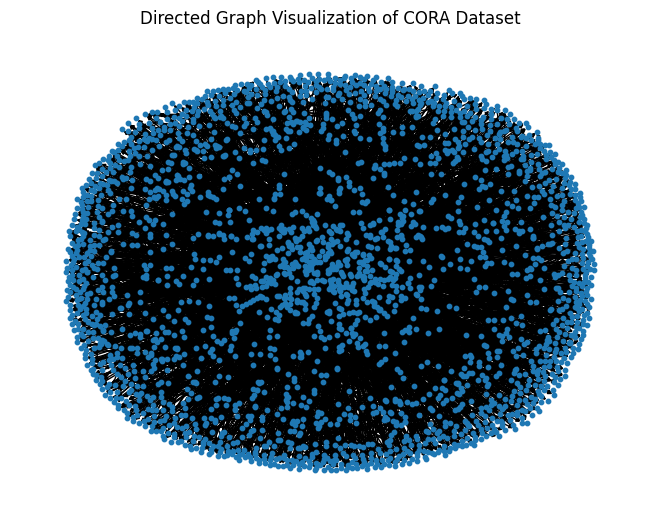

In [12]:
# Draw the graph
nx.draw(G, pos, with_labels=False, arrowsize=5, node_size=10)
plt.title('Directed Graph Visualization of CORA Dataset')
plt.show()

In [13]:
# Specify the file path for saving the graph in the Downloads folder
file_path = "C:\\Users\\HP\\Downloads\\graph.graphml"

In [14]:
# Save the graph in GraphML format
nx.write_graphml(G, file_path)

# LEADER SELECTION

In [15]:
# Load paper attributes from 'cora.content'
columns = ["paper_id"] + [f"word_{i}" for i in range(1433)] + ["class_label"]
content_df = pd.read_csv("cora.content", sep='\t', header=None, names=columns)

In [16]:
# Load citation information from 'cora.cites'
cites_df = pd.read_csv("cora.cites", sep='\t', header=None, names=["cited_paper_id", "citing_paper_id"])

In [17]:
# Preprocess the data
word_attributes = content_df.iloc[:, 1:-1]
class_labels = content_df.iloc[:, -1]

In [18]:
# Construct the graph
G = nx.from_pandas_edgelist(cites_df, 'cited_paper_id', 'citing_paper_id')

In [19]:
# Compute eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

In [20]:
# Create a composite score
composite_score = 0.5 * pd.Series(eigenvector_centrality) + 0.5 * word_attributes.sum(axis=1)

In [21]:
# Identify top leaders
top_leaders = composite_score.sort_values(ascending=False).head(25)

In [22]:
from tabulate import tabulate

# Assuming 'top_leaders' is your Series
table = tabulate(top_leaders.reset_index(), headers=['Node ID', 'Composite Score'], tablefmt='pretty', showindex=False)

print(table)


+---------+--------------------+
| Node ID |  Composite Score   |
+---------+--------------------+
| 1959.0  | 13.500561068555209 |
|  35.0   | 13.327149847831864 |
| 1213.0  |        13.0        |
|  130.0  | 12.500915138950374 |
| 1237.0  | 12.500028588786398 |
| 2663.0  | 12.50000097353997  |
| 1481.0  | 12.000315461483432 |
| 1999.0  | 12.000115640453444 |
| 1365.0  | 11.503934523929207 |
|  936.0  | 11.502187351095742 |
|  940.0  | 11.50016280929713  |
| 1717.0  | 11.000092165477113 |
|  506.0  | 11.000000000605072 |
|  434.0  | 10.502024110994565 |
| 2653.0  | 10.501825839003514 |
| 1026.0  | 10.500217273295576 |
|  941.0  | 10.500173467608288 |
| 2696.0  | 10.500048829936036 |
|  887.0  | 10.045702971786353 |
| 1033.0  | 10.02610344751446  |
| 1955.0  | 10.003356321250436 |
|  943.0  | 10.000312499314926 |
| 2440.0  | 10.000257633544532 |
| 1786.0  | 10.000204584960644 |
|  463.0  | 10.00005085002802  |
+---------+--------------------+


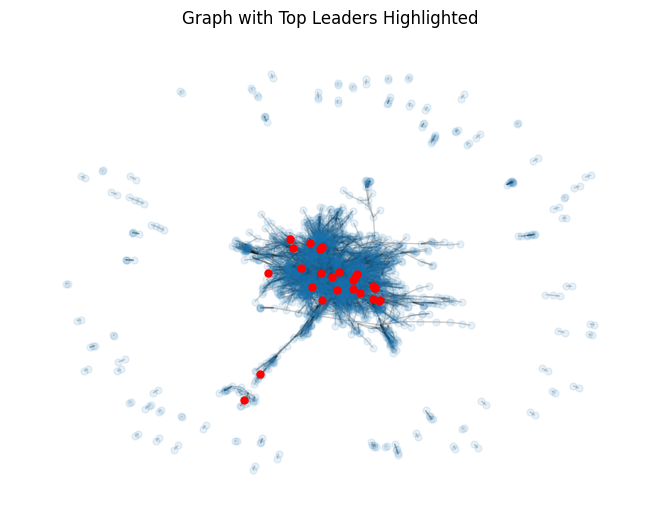

In [23]:
# Assign the 'top_leader' attribute to top leader nodes
for node in top_leaders.index:
    G.nodes[node]['top_leader'] = 1

# Draw the entire graph with nodes and edges
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=25, alpha=0.1)

# Draw the top leaders with a different color
top_leader_nodes = [node for node, attr in G.nodes(data=True) if 'top_leader' in attr and attr['top_leader'] == 1]
nx.draw_networkx_nodes(G, pos, nodelist=top_leader_nodes, node_color='red', node_size=25)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.1)

plt.title('Graph with Top Leaders Highlighted')
plt.show()

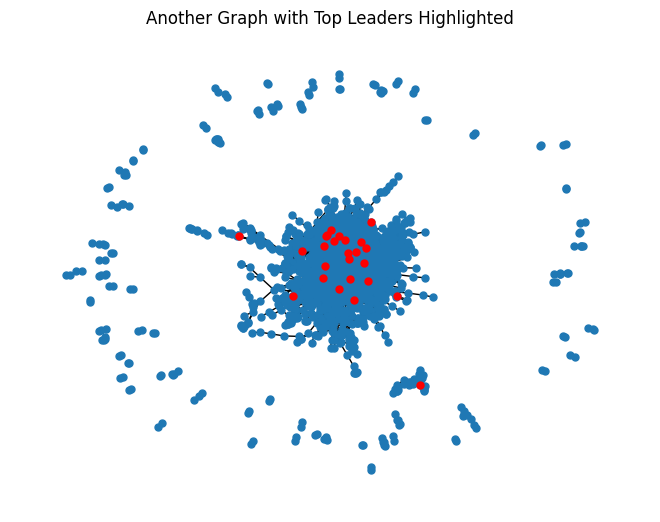

In [24]:
# Assign the 'top_leader' attribute to top leader nodes
for node in top_leaders.index:
    G.nodes[node]['top_leader'] = 1

# Draw the entire graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=25)

# Draw the top leaders with a different color
top_leader_nodes = [node for node, attr in G.nodes(data=True) if 'top_leader' in attr and attr['top_leader'] == 1]
nx.draw_networkx_nodes(G, pos, nodelist=top_leader_nodes, node_color='red', node_size=25)

plt.title('Another Graph with Top Leaders Highlighted')
plt.show()

# COMMUNITY COMPUTATION

/var/folders/35/fb9gp7l94nbdtq_st2wplpz00000gn/T/ipykernel_5587/2925382779.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx_nodes(G, pos, node_size=25, node_color=list(partition.values()), cmap=plt.cm.get_cmap('viridis'))


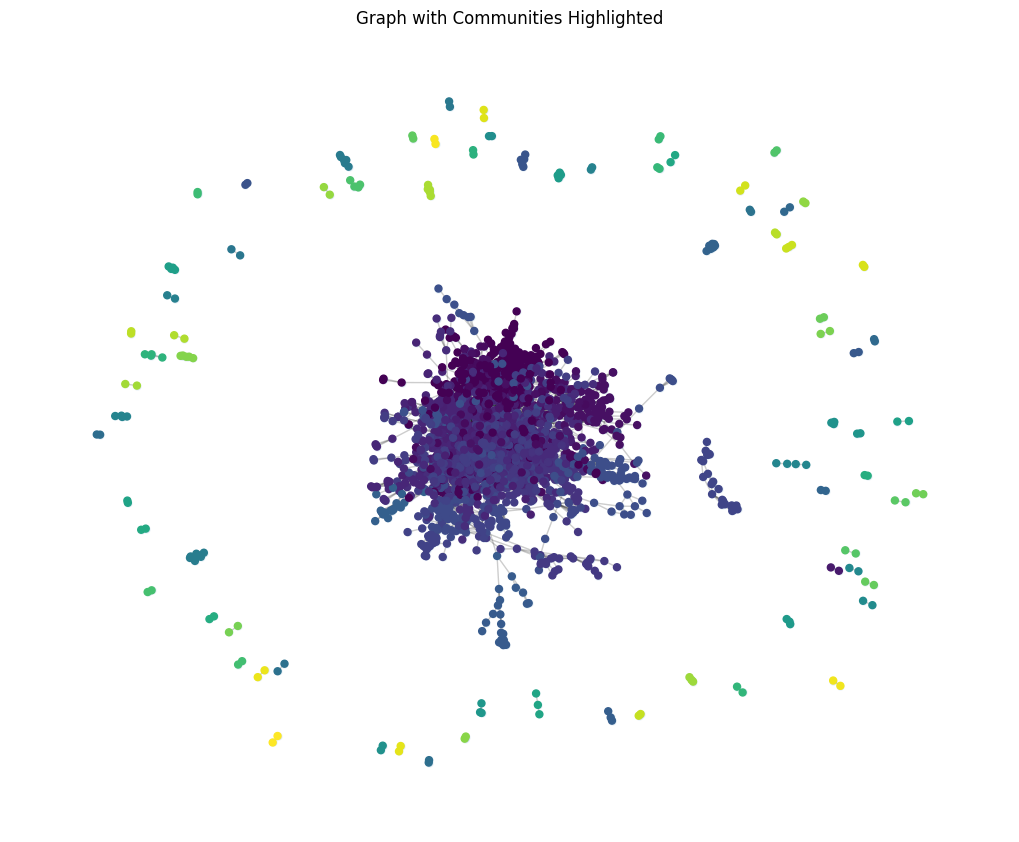

In [25]:
import community  # Louvain community detection

# Run Louvain community detection
partition = community.best_partition(G)

# Add the community attribute to nodes in the graph
for node, community_id in partition.items():
    G.nodes[node]['community'] = community_id

# Visualize the communities
plt.figure(figsize=(10, 8))

# Use spring layout
pos = nx.spring_layout(G)

# Draw the entire graph
nx.draw(G, pos, with_labels=False, node_size=25, alpha=0.1)

# Draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_size=25, node_color=list(partition.values()), cmap=plt.cm.get_cmap('viridis'))

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.1)

plt.title('Graph with Communities Highlighted')
plt.show()


In [26]:
import community
import networkx as nx

# Assuming G is your directed graph
# Convert to undirected graph
G_undirected = G.to_undirected()

# Identify top leaders
top_leaders1 = composite_score.sort_values(ascending=False).head(10)

# Extract node IDs of the top leaders
top_leader_nodes = top_leaders1.index.tolist()

# Compute the best partition using the Louvain algorithm for the subgraph induced by top leaders
partition_top_leaders = community.best_partition(G.subgraph(top_leader_nodes))

# Assign community labels to nodes in the original graph
for node, community_id in partition_top_leaders.items():
    G.nodes[node]['community'] = community_id

# Create a mapping of community IDs to colors
community_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple', 5: 'yellow', 6: 'cyan', 7: 'pink', 8: 'brown', 9: 'gray'}

# Get node colors based on the assigned community, default to 'black' if community ID not found
node_colors = [community_colors.get(data.get('community', -1), 'black') for node, data in G.nodes(data=True)]

# Export the graph to a GraphML file
output_graphml_path = "C:\\Users\\HP\\Downloads\\output_graph.graphml"
nx.write_graphml(G, output_graphml_path)

print(f"Graph exported to {output_graphml_path}")


Graph exported to C:\Users\HP\Downloads\output_graph.graphml
